# Bank Churn Classfication

## Objective and Reasons
* Objective:
    The purpose of classifying bank churn is to predict which customers are most likely to quit, allowing the bank to take proactive efforts to increase retention and satisfaction. By assessing criteria such as credit scores and account balances, the algorithm identifies at-risk consumers, allowing the bank to better target retention efforts. This not only lowers the expenses of client attrition, but it also enhances customer loyalty, which helps the bank's growth and competitive advantage.
* Reason:
    The goal of analyzing bank churn is to predict which customers are likely to leave the bank, allowing the institution to take proactive measures to retain them. By identifying patterns and factors associated with customer churn, such as demographic characteristics, account usage, or customer behavior, banks can target at-risk customers with personalized offers or improved services. This helps reduce customer attrition, optimize marketing strategies, and ultimately improve customer satisfaction and the bank's profitability. Understanding churn also enables better decision-making for resource allocation and customer engagement.

## Description of the Features
* RowNumber: The sequential number assigned to each row in the dataset
* CustomerID: A unique identifier for each customer
* Surname: The surname of the customer
* CreditScore: The credit score of the customer
* Geography: The geographical location of the customer
* Gender: The gender of the customer
* Age: The age of the customer
* Tenure: The number of years the customer has been with the bank
* Balance: The account balance of the customer 
* NumOfProducts: The number of bank products the customer has
* HasCrCard: Indicates whether the customer has a credit card (binary: yes/no)
* IsActiveMember: Indicates whehter the customer is an active member (binary:   yes/no)
* EstimatedSalary: The estimated salary of the customer. 
* Exited: Indicates whether the customer has exited the bank (binary: yes/no)

## Libraries and Importing the Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency 

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV

In [3]:
bank = pd.read_csv('bank_churn_modeling.csv')
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Pre-Processing the Data

In [4]:
print(bank.shape)

(10000, 14)


In [5]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
bank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [11]:
bank.duplicated().sum()

0

In [12]:
bank = bank.drop(['RowNumber','CustomerId','Surname'],axis=1)
print(bank)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

## EDA

### Numerical features Histogram with Kernal Density Estimation (KDE)

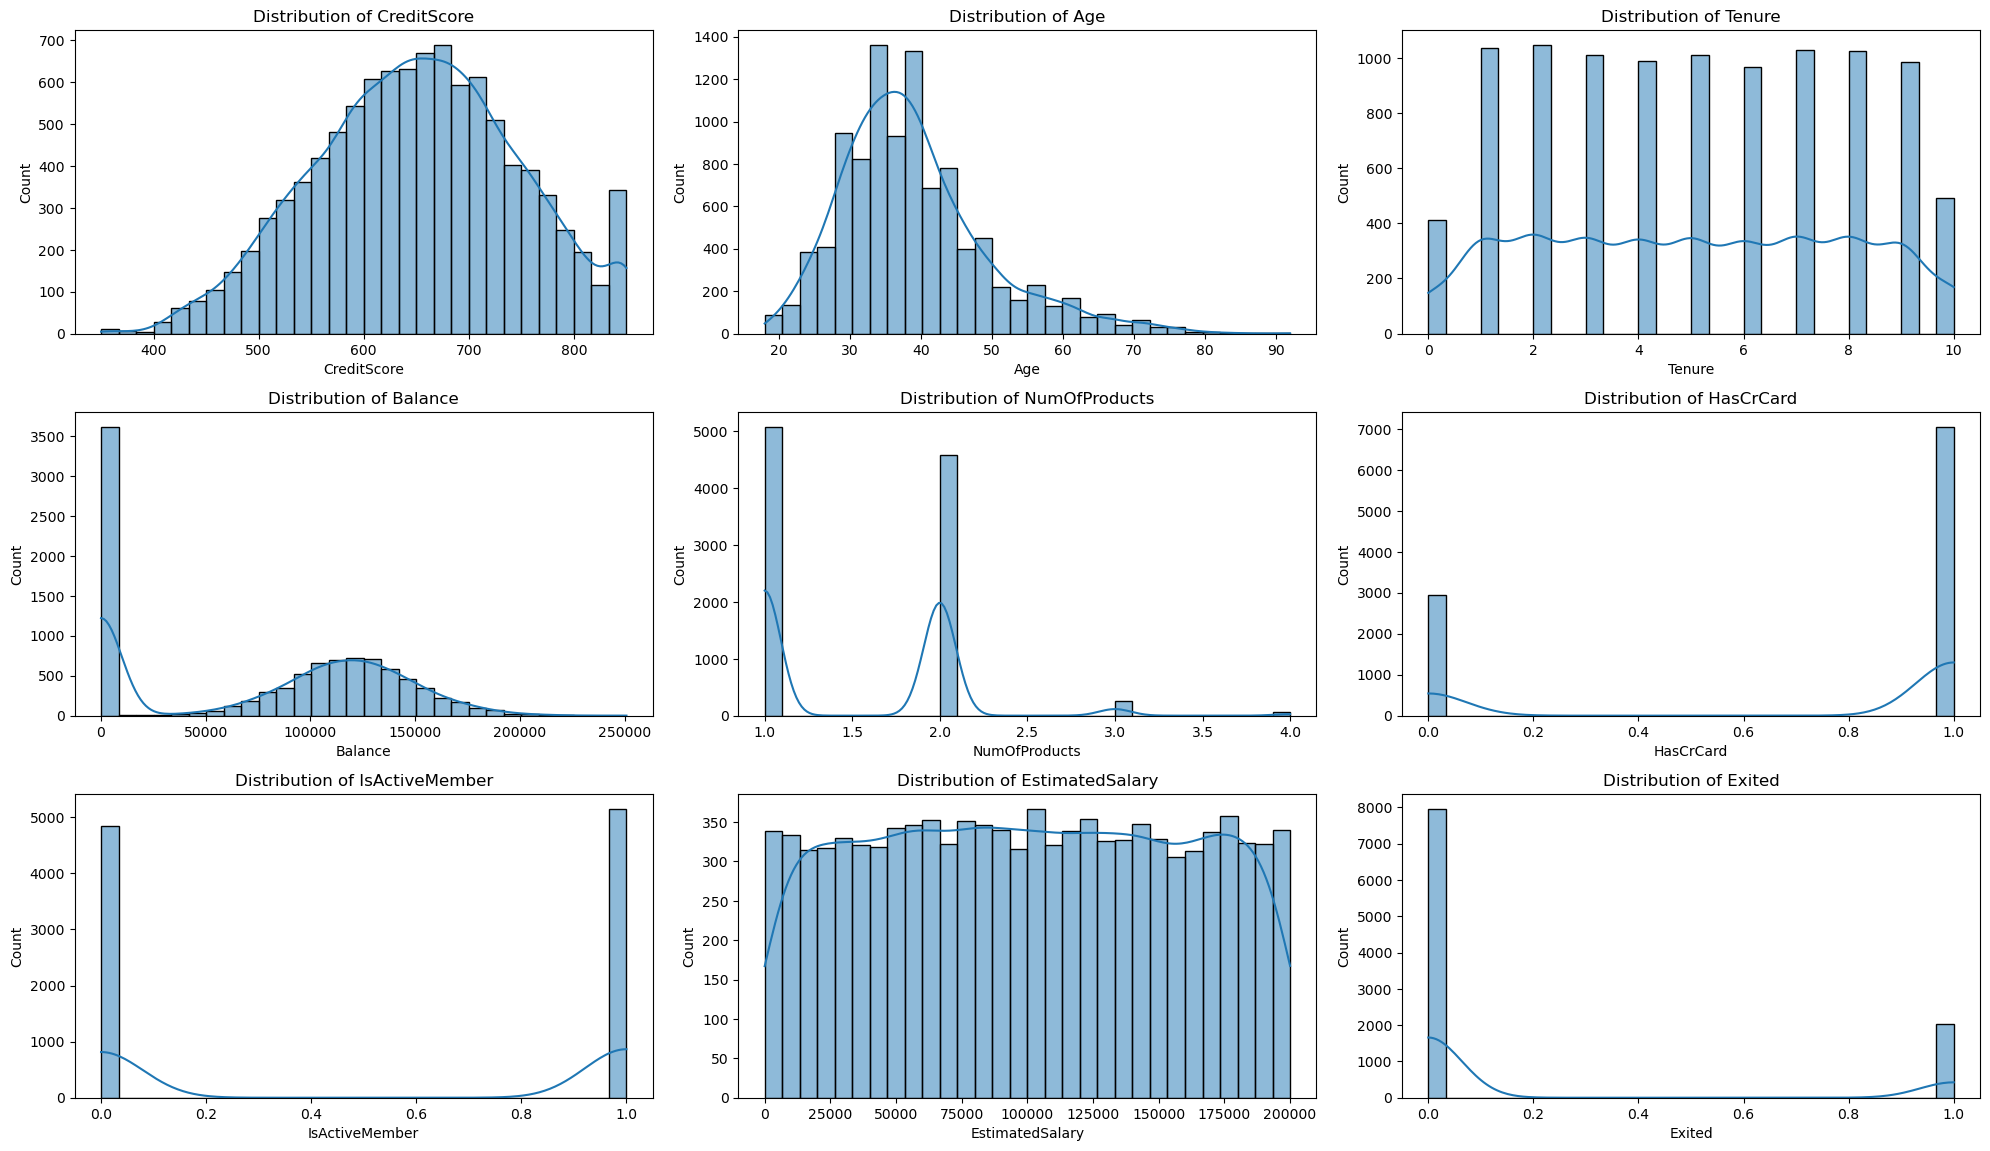

In [13]:
num_cols = bank.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(bank[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Histogram Count of Categorical Feature: Geography and Gender

C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\521837057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(y=bank[col], order=top_10_values, palette='muted')
C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\521837057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(y=bank[col], order=top_10_values, palette='muted')


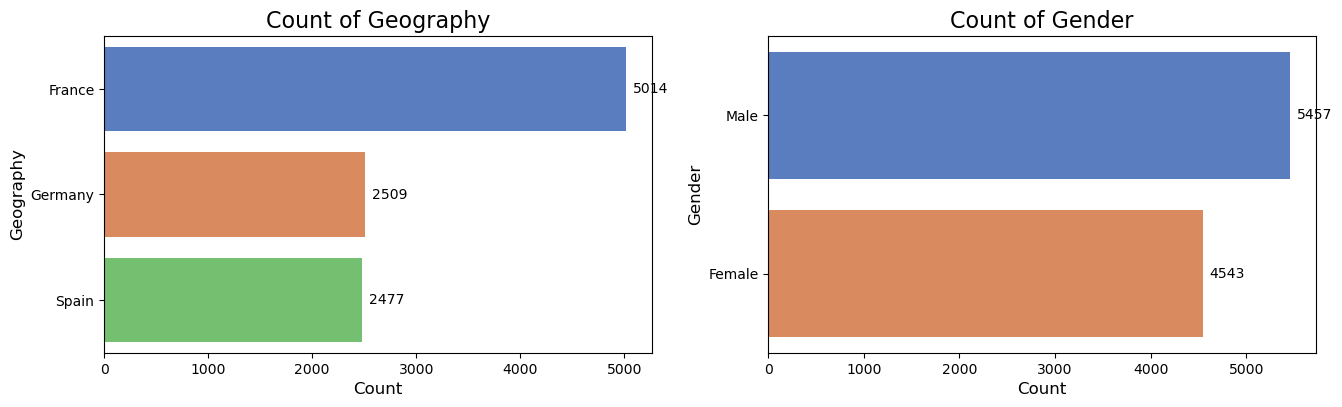

In [15]:
cat_cols = bank.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)
    
  
    top_10_values = bank[col].value_counts().nlargest(10).index
    plot = sns.countplot(y=bank[col], order=top_10_values, palette='muted')
    
    
    plt.title(f'Count of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    # Add labels on the bars
    for p in plot.patches:
        count = int(p.get_width())  # The count for each category
        plot.annotate(f'{count}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', 
                      fontsize=10, color='black', 
                      xytext=(5, 0),  # offset text slightly
                      textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\4275035226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x=target, y=col, data=bank, palette='muted')
C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\4275035226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x=target, y=col, data=bank, palette='muted')
C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\4275035226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x=target, y=col, data=bank, palette='muted')
C:\Users\Sophi\AppData\Local\Temp\ipyker

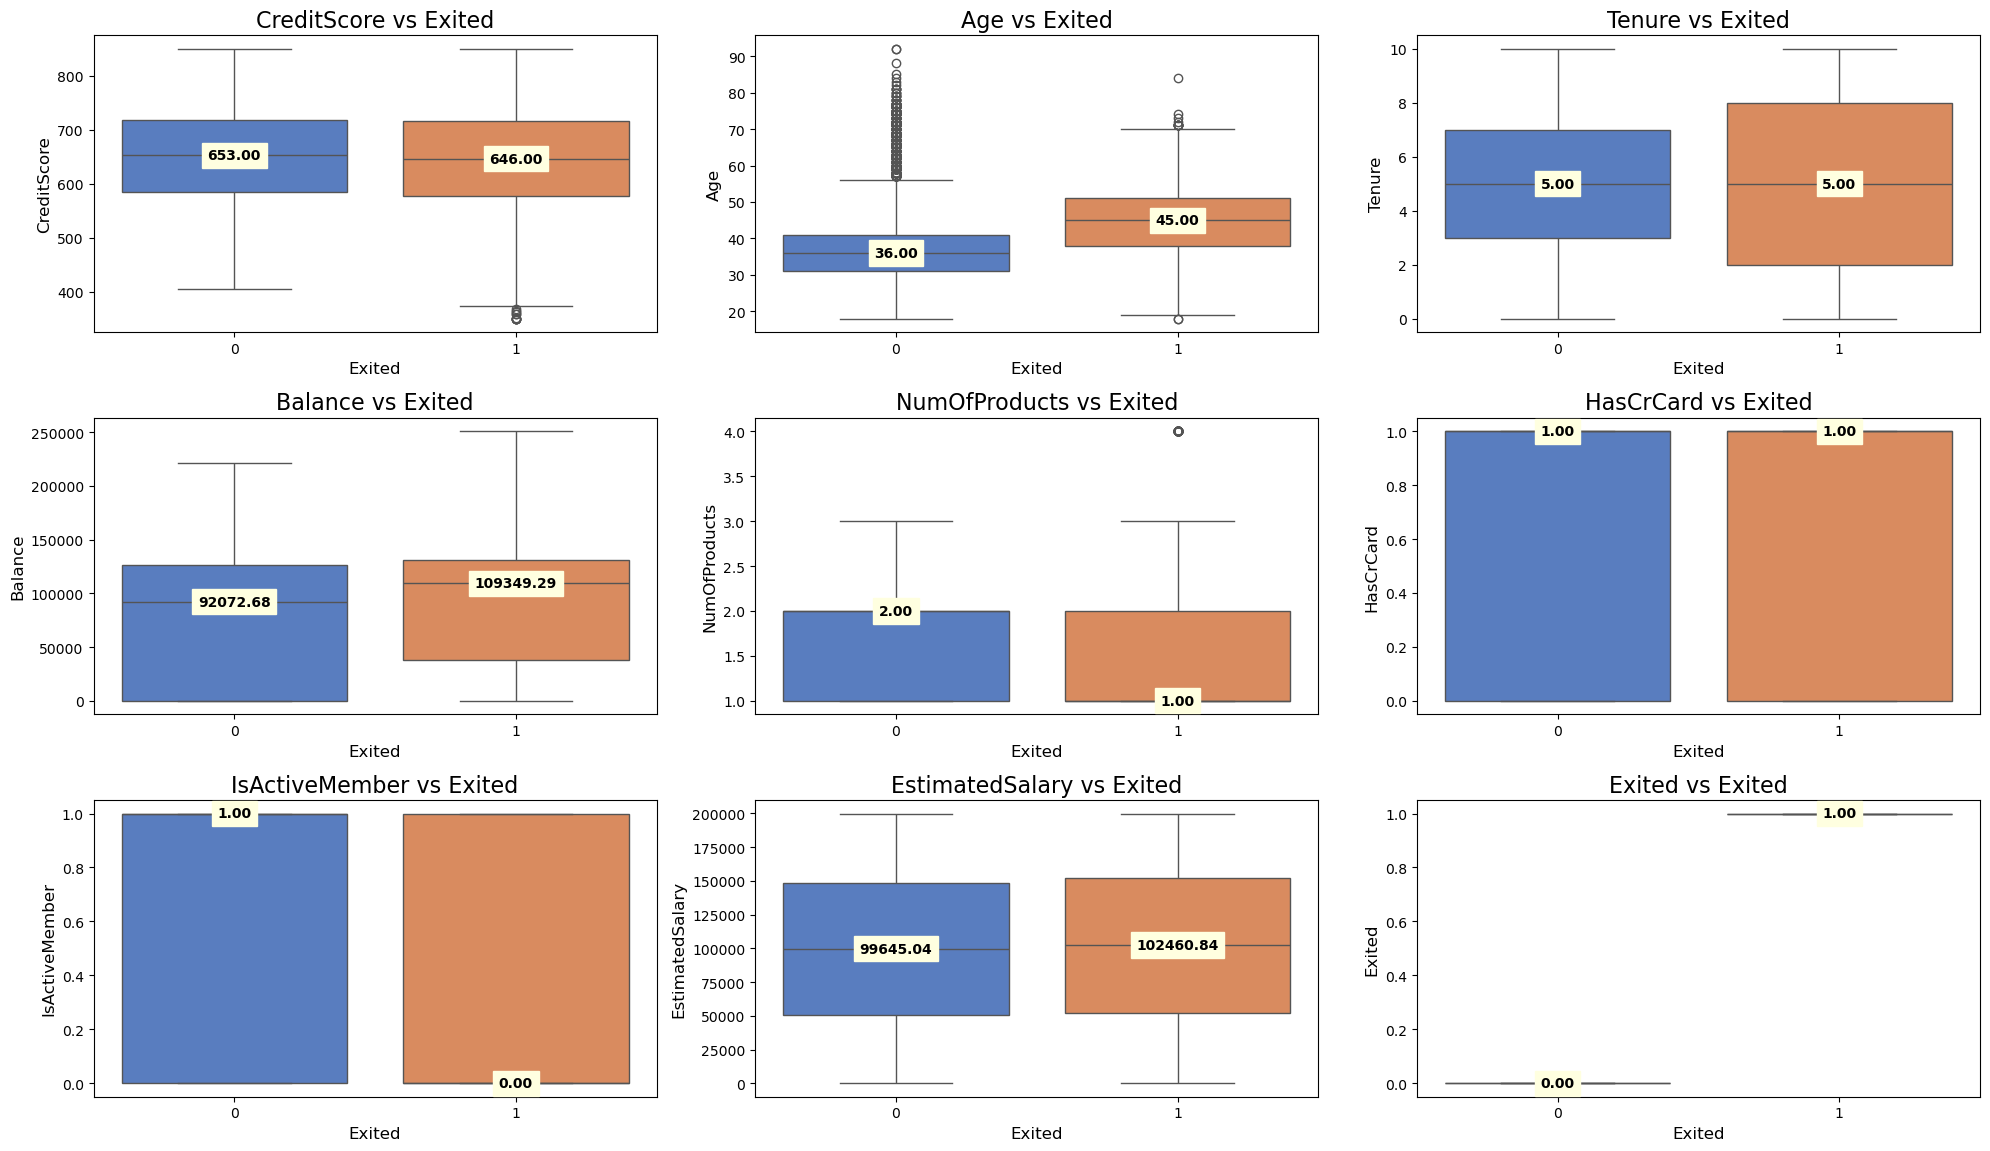

In [16]:
target = 'Exited'

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    box_plot = sns.boxplot(x=target, y=col, data=bank, palette='muted')
    
    # Title for each subplot
    plt.title(f'{col} vs {target}', fontsize=16)
    plt.xlabel(target, fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    # Add median labels
    medians = bank.groupby(target)[col].median()  # Calculate medians for each target category
    for j, median in enumerate(medians):
        plt.text(j, median, f'{median:.2f}', ha='center', va='center', 
                 fontweight='bold', color='black', backgroundcolor='lightyellow', fontsize=10)

plt.tight_layout()
plt.show()

### Tartget Variable vs. Gender, Geography Histogram

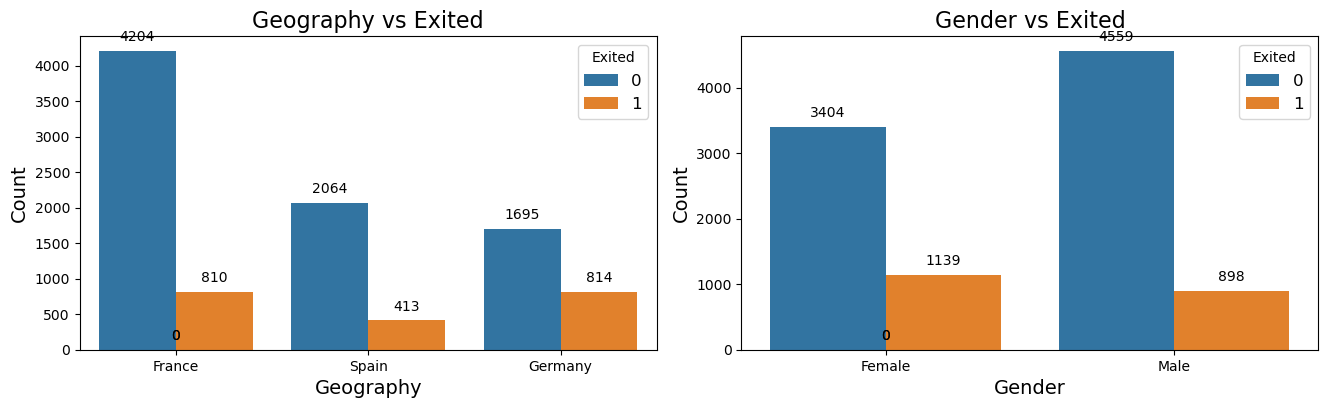

In [17]:
plt.figure(figsize=(20, 15))

# Loop over each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 3, i)
    top_10_values = bank[col].value_counts().nlargest(10).index
    plot = sns.countplot(x=col, hue=target, data=bank[bank[col].isin(top_10_values)])
    
    # Set titles and legend
    plt.title(f'{col} vs {target}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title=target, fontsize=12)
    
    # Add labels on the bars
    for p in plot.patches:
        count = int(p.get_height())  # Get the count of each bar
        plot.annotate(f'{count}', 
                      (p.get_x() + p.get_width() / 2, p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # offset text slightly above the bar
                      textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

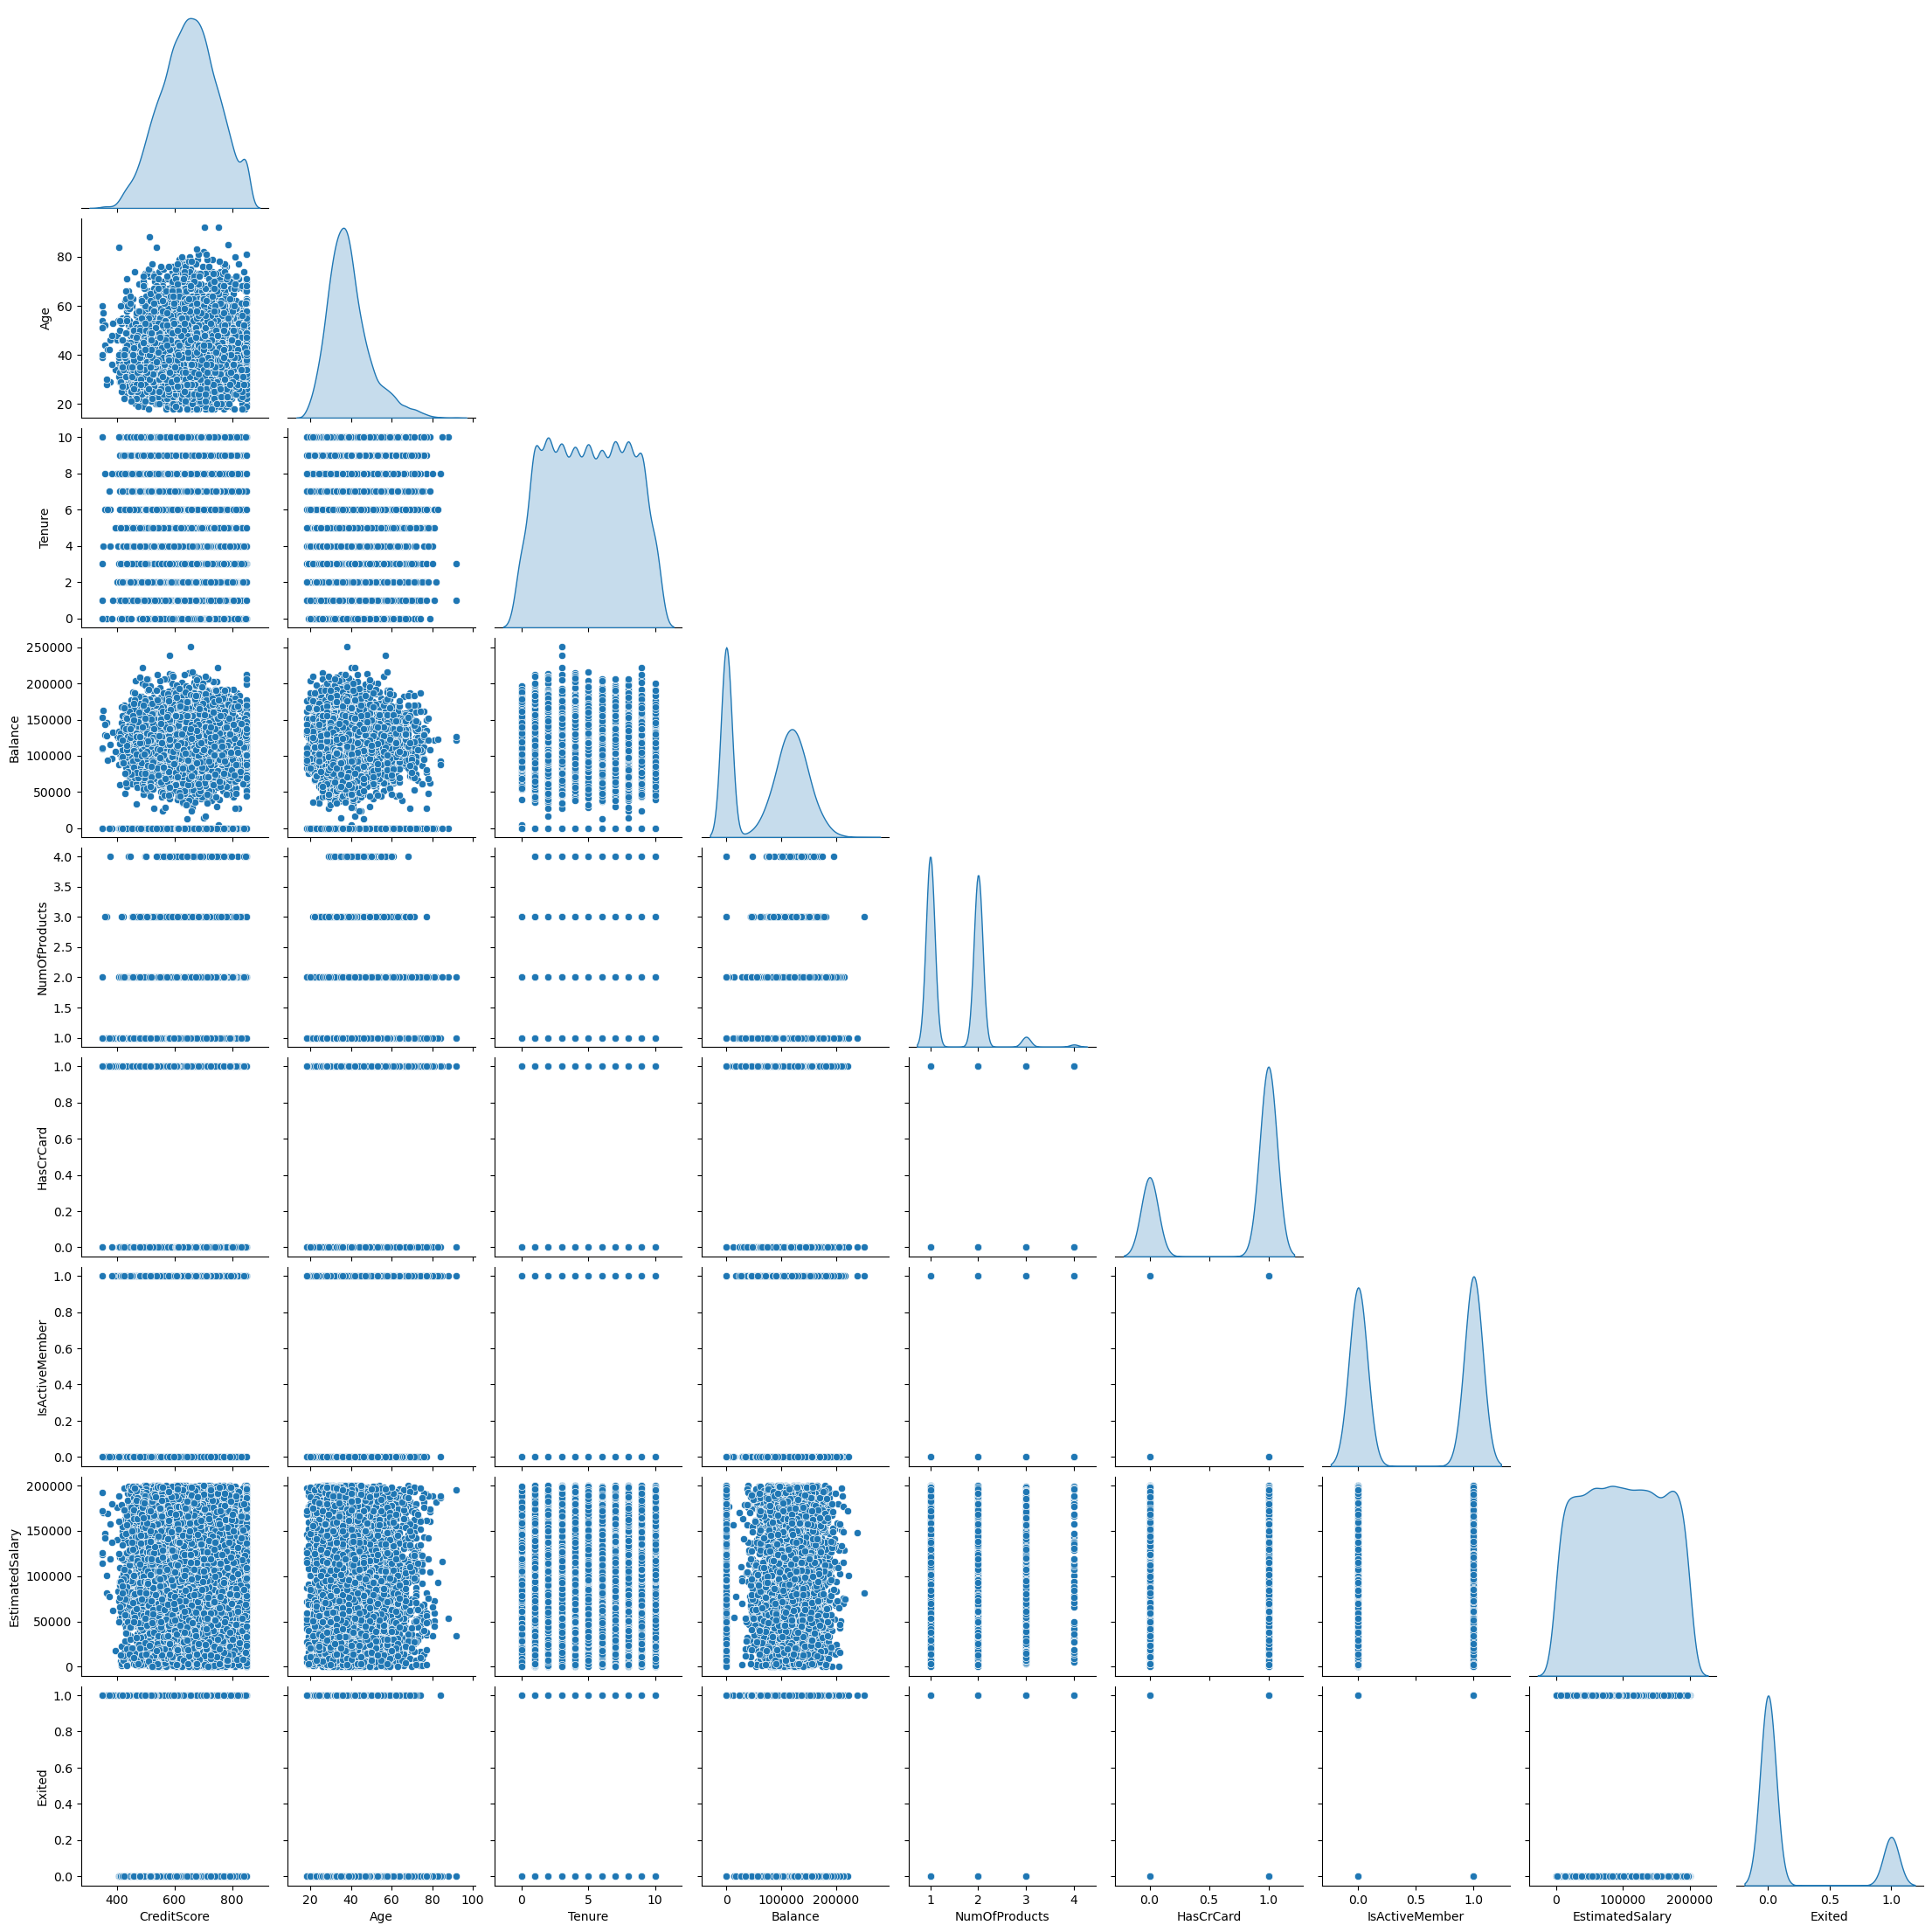

In [46]:
sns.pairplot(bank[num_cols], diag_kind='kde', corner=True)
plt.show()

## Correlation Numerical and Categorical Matrix

In [19]:
numerical_feat=  bank.select_dtypes(include=['int64','float64']).columns
num_ban = bank[numerical_feat]


correlation_matrix = num_ban.corr()
print(correlation_matrix)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

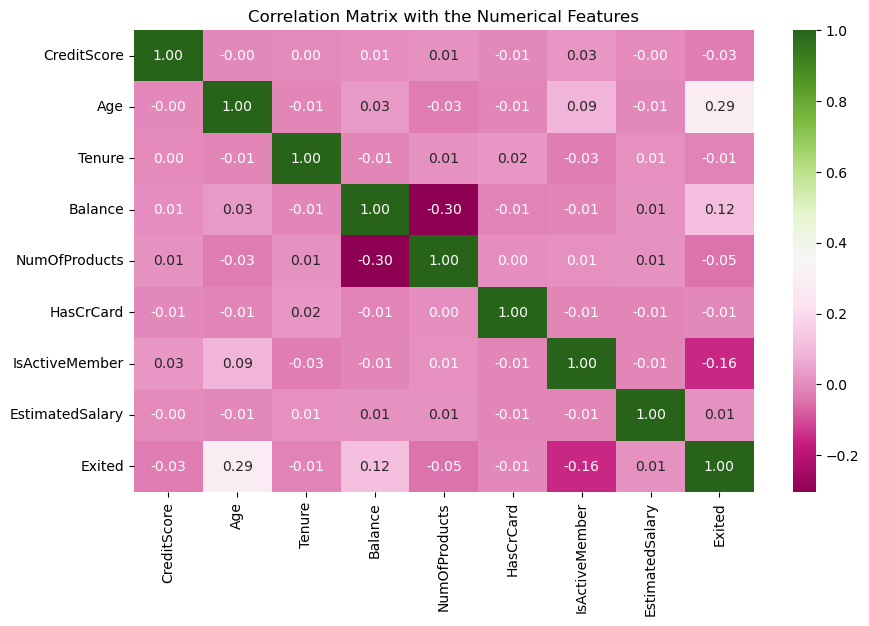

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Matrix with the Numerical Features')
plt.show()

In [21]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Select only categorical columns
cat_cols = bank.select_dtypes(include=['object', 'category']).columns

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), 
                                index=cat_cols, columns=cat_cols)

In [22]:
# Calculate Cramér's V for each pair of categorical features
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Set diagonal to 1
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(bank[col1], bank[col2])

In [23]:
cramers_v_matrix = cramers_v_matrix.corr()
print(cramers_v_matrix)

           Geography  Gender
Geography        1.0    -1.0
Gender          -1.0     1.0


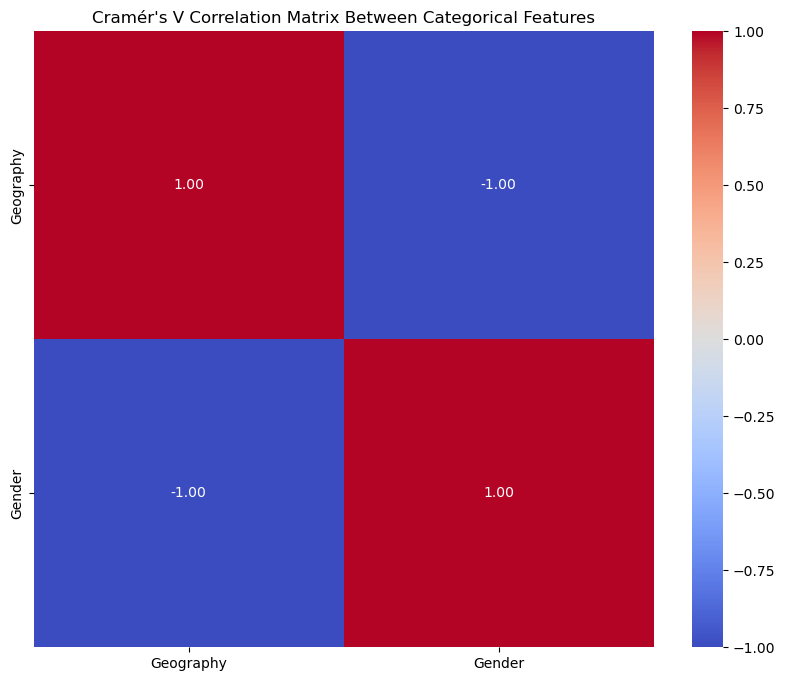

In [24]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Correlation Matrix Between Categorical Features")
plt.show()

## Training Data

In [25]:
X = bank.drop('Exited', axis=1)
y = bank['Exited']

In [26]:
# Encode categorical features
bank = pd.get_dummies(bank, drop_first=True)

In [27]:
# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [28]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [29]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical features
encoded_cats = encoder.fit_transform(X[categorical_features])

# Create a DataFrame for the encoded categorical features
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate the encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_cat_df], axis=1)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classifcation Models: Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Machines, Gradient Boosting, and Bernoulli Naive Bayes

In [31]:
# Initialize the Linear Regression Model
model = LogisticRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_logreg = accuracy_score(y_test, y_pred_logreg)
ps_logreg = precision_score(y_test, y_pred_logreg)
rs_logreg = recall_score(y_test, y_pred_logreg)
f1s_logreg = f1_score(y_test, y_pred_logreg)

# Calculate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Confusion Matrix:\n", conf_matrix_logreg)

Confusion Matrix:
 [[1544   63]
 [ 314   79]]


In [32]:
# Initialize the model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_knn = accuracy_score(y_test, y_pred_knn)
ps_knn = precision_score(y_test, y_pred_knn)
rs_knn =  recall_score(y_test, y_pred_knn)
f1s_knn = f1_score(y_test, y_pred_knn)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix:\n", conf_matrix_knn)

Confusion Matrix:
 [[1522   85]
 [ 222  171]]


In [33]:
# Initialize the Decision Tree Classification model
dt_model = DecisionTreeClassifier(random_state=42)

#Train the model 
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_dt = accuracy_score(y_test, y_pred_dt)
ps_dt =  recall_score(y_test, y_pred_dt)
rs_dt =  recall_score(y_test, y_pred_dt)
f1s_dt = f1_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix:\n", conf_matrix_dt)

Confusion Matrix:
 [[1363  244]
 [ 194  199]]


In [34]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


#Accurcay, Precision, Recall, F1-Score, ROC
ac_rf = accuracy_score(y_test, y_pred_rf)
ps_rf = precision_score(y_test, y_pred_rf)
rs_rf =  recall_score(y_test, y_pred_rf)
f1s_rf = f1_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[1549   58]
 [ 208  185]]


In [35]:
# Initialize the Support Vector Machines model
svm_model = SVC(probability=True)  

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_svm = accuracy_score(y_test, y_pred_svm) 
ps_svm = precision_score(y_test, y_pred_svm)
rs_svm = recall_score(y_test, y_pred_svm)
f1s_svm = f1_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix:\n", conf_matrix_svm)

Confusion Matrix:
 [[1570   37]
 [ 248  145]]


In [36]:
# Initialize the Gradient Boosting model
gbc_model = GradientBoostingClassifier(n_estimators=100)

# Train the model
gbc_model.fit(X_train, y_train)

# Make predictions
y_pred_gbc = gbc_model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_gbc = accuracy_score(y_test, y_pred_gbc)
ps_gbc = precision_score(y_test, y_pred_gbc)
rs_gbc =  recall_score(y_test, y_pred_gbc)
f1s_gbc = f1_score(y_test, y_pred_gbc)

# Calculate confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print("Confusion Matrix:\n", conf_matrix_gbc)

Confusion Matrix:
 [[1543   64]
 [ 201  192]]


In [37]:
# Initialize Bernoulli Naive Bayes model
bnb_model = BernoulliNB()

# Train the model
bnb_model.fit(X_train, y_train)

# Make predictions
y_pred_bnb = bnb_model.predict(X_test)

#Accurcay, Precision, Recall, F1-Score, ROC
ac_bnb = accuracy_score(y_test, y_pred_bnb)
ps_bnb = precision_score(y_test, y_pred_bnb)
rs_bnb =  recall_score(y_test, y_pred_bnb)
f1s_bnb = f1_score(y_test, y_pred_bnb)

# Calculate confusion matrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)

print("Confusion Matrix:\n", conf_matrix_bnb)

Confusion Matrix:
 [[1520   87]
 [ 289  104]]


## Evulation of the Classfication Models with Visulaization 

In [38]:
# Calculate metrics for each model
results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Gradient Boosting', 'Bernoulli Naive Bayes'],
    'Accuracy': [ac_logreg, ac_knn, ac_dt, ac_rf, ac_svm, ac_gbc, ac_bnb],
    'Precision': [ps_logreg, ps_knn, ps_dt, ps_rf, ps_svm, ps_gbc, ps_bnb],
    'Recall': [rs_logreg, rs_knn, rs_dt, rs_rf, rs_svm, rs_gbc, rs_bnb],
    'F1-Score': [f1s_logreg, f1s_knn, f1s_dt, f1s_rf, f1s_svm, f1s_gbc, f1s_bnb]
}

# Display results
results_df = pd.DataFrame(results)

print(results_df)


                     Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression    0.8115   0.556338  0.201018  0.295327
1      K-Nearest Neighbors    0.8465   0.667969  0.435115  0.526965
2            Decision Tree    0.7810   0.506361  0.506361  0.476077
3            Random Forest    0.8670   0.761317  0.470738  0.581761
4  Support Vector Machines    0.8575   0.796703  0.368957  0.504348
5        Gradient Boosting    0.8675   0.750000  0.488550  0.591680
6    Bernoulli Naive Bayes    0.8120   0.544503  0.264631  0.356164


C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\2637862979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Accuracy', palette='viridis')
C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\2637862979.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Precision', palette='mako')
C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\2637862979.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Recall', palette='icefire')
C:\Users\Sophi\AppData\Local\Temp\ip

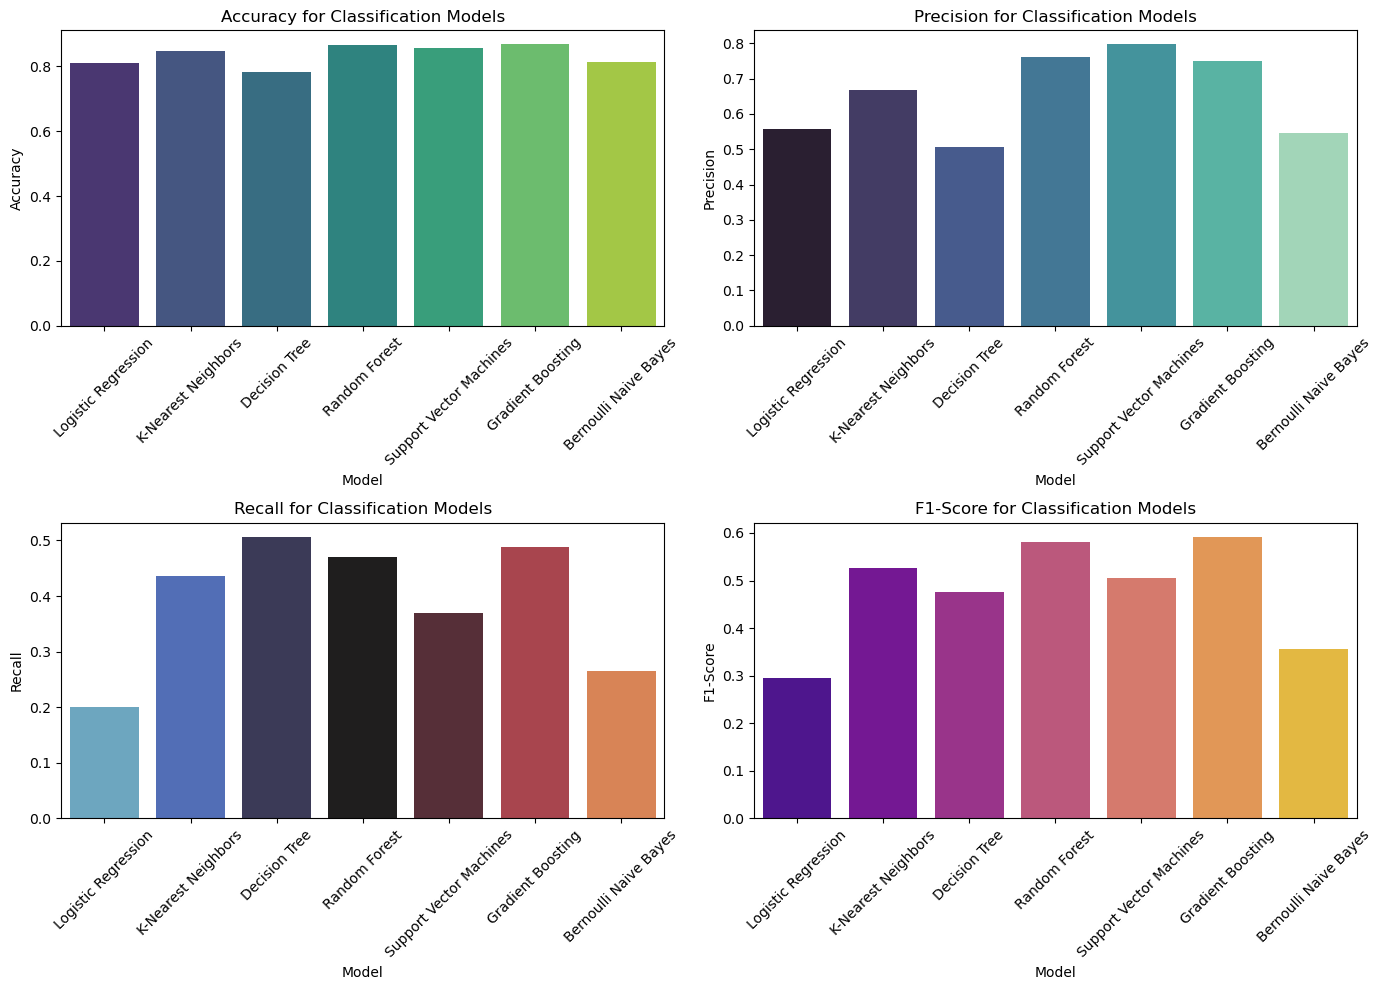

In [39]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(data=results, x='Model', y='Accuracy', palette='viridis')
plt.title('Accuracy for Classification Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(data=results, x='Model', y='Precision', palette='mako')
plt.title('Precision for Classification Models')
plt.xticks(rotation=45)
plt.ylabel('Precision')

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(data=results, x='Model', y='Recall', palette='icefire')
plt.title('Recall for Classification Models')
plt.xticks(rotation=45)
plt.ylabel('Recall')

# Plot F1-Score
plt.subplot(2, 2, 4)
sns.barplot(data=results, x='Model', y='F1-Score', palette='plasma')
plt.title('F1-Score for Classification Models')
plt.xticks(rotation=45)
plt.ylabel('F1-Score')

# Show the plot
plt.tight_layout()
plt.show()


## Results from the 7 Classification Models
* Logistic Regression:
    * Accuracy: 0.8115 or 81.15% of the predictions are correct
    * Precision: 0.5563 or 55.63% of the posistive predictions are acurate
    * Recall: 0.2010 or 20.10% of the actual churn cases
    * F1-Score: 0.2953 or 29.53% which is the balance precision and recall, indicate a low score of weak handling of churn cases.
* Summary: Logistic Regression has high accuracy but low recall scores, indicate the model missies many churn. 

* K-Nearest Neighbors (KNN)
    * Accuracy: 0.8465 or 84.65% of the predictions are correct 
    * Precision: 0.6880 or 68.80%  indicate of positive predictions are true
    * Recall: 0.4351 or 43.51% captures the actual churn cases
    * F1-Score: 0.5270 or 52.70% is a moderate balance of precision and recall
* Summary: KNN performs resoanably well in all areas, that captures more churn cases with a good balance of precision and recall.

* Decision Tree
    * Accuracy: 0.7810 or 78.10% which show a bit lower on the prediction than other models
    * Precision: 0.5064 or 50.64% which show half of the churn predictions are accurate.
    * Recall: 0.5064 or 50.64% which capture half of the actual churn cases
    * F1-Score: 0.4617 or 46.17% which show balance but lower than the ideal which is 50% precision and recall. 
* Summary: The Decision Tree model has a balanced performance in precision and recall, but overall the scores are low.

* Random Forest
    * Accuracy: 0.8670 or 86.70% of the predictions are correct and one of the highest 
    * Precision: 0.7613 or 76.13% which show high precision values that indicate a strong positive prediction reliability
    * Recall: 0.4707 or 47.07% which show decent recall but not in 
    * F1-Score: 0.5818 or 58.18% which indicate a good balance 
* Summary: The Random Forest showhigh accuracy and strong precision, which make an effective at correct positive predictions. However, recall need some improvemnt. 

* Support Vector Machines (SVM)
    * Accuracy: 0.8575 or 85.75% of the predictions are correct and one of the highest 
    * Precision: 0.7967 or 79.67% which show highest precision among the models, which indicate a positive predictions.
    * Recall: 0.3690 or 36.90% which show the lowest of capturing actual churn cases. 
    * F1-Score: 0.5043 or 50.17% which show a modest score of precision and recall
* Summary: The SVM provides excellent accuracy and precision but struggle recall which may overlook churn cases. 

* Gradient Boosting
    * Accuracy: 0.8675 or 86.75% of the predictions are correct and the highest overall
    * Precision: 0.7500 or 75% which show highest precision among the models, which indicate a positive predictions.
    * Recall: 0.4886 or 48.86% which show capturing almost half of the churn cases.
    * F1-Score: 0.5917 or 59.17% which show a good balance score of precision and recall
* Summary: The Gradient Boosting is the top-performing model, balancing accuracy, precision, and recall effectively. 

* Bernoulli Navie Bayes
    * Accuracy: 0.8120 or 81.20% of the predictions are correct and one of the highest 
    * Precision: 0.5445 or 54.45% which indicate modest reliability of positive predictions
    * Recall: 0.2646 or 26.90% which show the lowest of capturing actual churn cases. 
    * F1-Score: 0.3562 or 35.62% which show a modest score of precision and recall
* Summary: The Bernoulli Navie Bayes has a good accuracy, but low recall which make unsuitable for high sensitiity to churn cases. 


The final decision after comparing all the 7 models of classfication, Gradient Boosting is the pick since accuracy has 86% which is the highest of the prediction, precision has 75% which is also the highest which indicate of the positive prediction, recall has 48.86% which is not high but close of having decent of capturing churn, and f1-score is 59.17% which show a good balance score of precision and recall.

## Hyptertune and Cross Vaildation

In [40]:
#The final decision is Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=100,random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],         # Learning rate
    'max_depth': [3, 4, 5],                    # Depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
}

# Define Stratified K-Fold Cross-Validation to keep class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_gbc = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best F1 Score from Cross-Validation:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score from Cross-Validation: 0.6002527395771932


In [41]:
# Make predictions on the test set
y_pred_gbc = best_gbc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_gbc)
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc)

## Final Result of Grandient Boosting with visual bar and cofunsion matrix

      Metric     Score
0   Accuracy  0.866500
1  Precision  0.736842
2     Recall  0.498728
3   F1 Score  0.594841


C:\Users\Sophi\AppData\Local\Temp\ipykernel_37204\1155890739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=results_gbc, palette='cool')


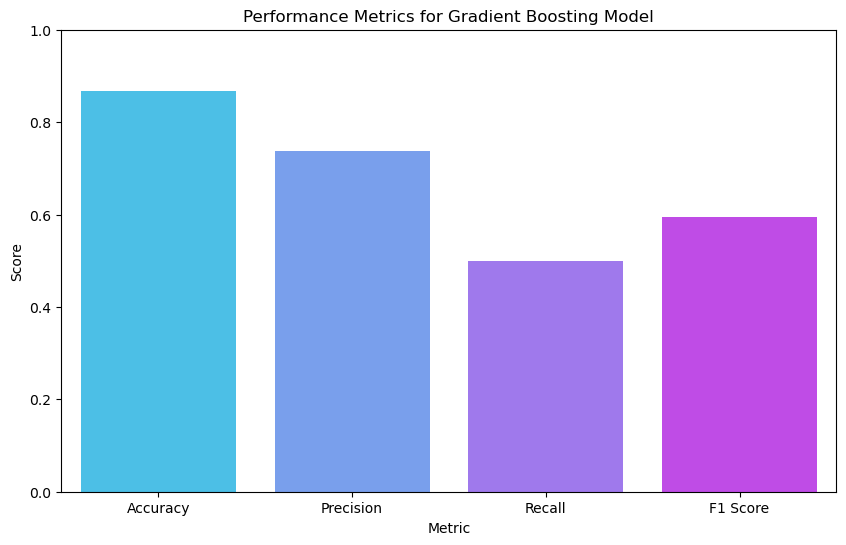

In [42]:
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}

# Create a DataFrame
results_gbc = pd.DataFrame(metrics)

# Display the table of metrics
print(results_gbc)

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=results_gbc, palette='cool')
plt.title('Performance Metrics for Gradient Boosting Model')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

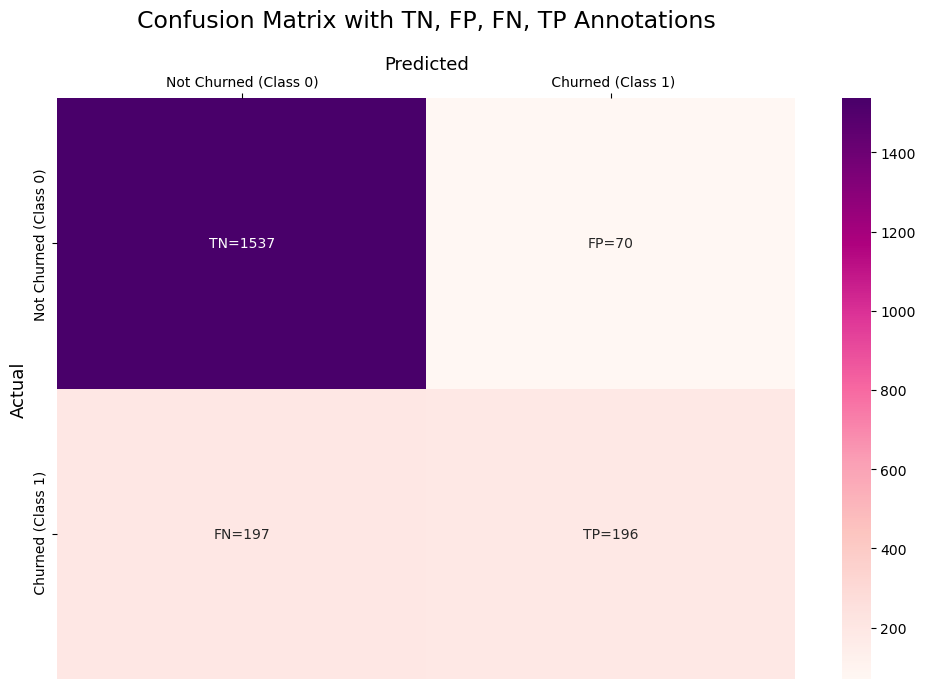

Classification Report:
                       precision    recall  f1-score   support

Not Churned (Class 0)       0.89      0.96      0.92      1607
    Churned (Class 1)       0.74      0.50      0.59       393

             accuracy                           0.87      2000
            macro avg       0.81      0.73      0.76      2000
         weighted avg       0.86      0.87      0.86      2000



In [43]:

# Display Confusion Matrix with Annotations
conf_matrix = confusion_matrix(y_test, y_pred_gbc)

# Extract TN, FP, FN, TP values 
tn, fp, fn, tp = conf_matrix.ravel()

# Create an annotated heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, 
            annot=[[f'TN={tn}', f'FP={fp}'], [f'FN={fn}', f'TP={tp}']], 
            fmt='', cmap='RdPu', 
            xticklabels=['Not Churned (Class 0)', ' Churned (Class 1)'], 
            yticklabels=['Not Churned (Class 0)', ' Churned (Class 1)'])

# Add labels and title
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix with TN, FP, FN, TP Annotations', fontsize=17, pad=20)

# Adjust the x-axis for better positioning
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.tight_layout()

# Display the heatmap
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc, target_names=['Not Churned (Class 0)', ' Churned (Class 1)']))


## Conclusion 

The Gradient Boosting with the hypertunning and cross vaildation, the result show of metrics and confustion matrix:
  * Metrics
       * Accuracy (0.8665): This means the model correctly predicted the class for about 87% of the cases.
       * Precision (0.7368): Of the cases predicted as churn, about 73.68% were actual churn cases.
       * Recall (0.4987): This indicates the model captured approximately 50% of actual churn cases, meaning there is room for improvement in catching more of these cases.
       * F1 Score (0.5948): The F1 score balances precision and recall, showing the model's ability to accurately identify churn cases.

* Confusion Matrix 
    * True Positives (TP): 196 — The model correctly predicted 196 customers as "Churn" who were indeed "Churn."
    * False Negatives (FN): 197 — The model incorrectly predicted 197 customers as "Non-Churn" who were actually "Churn."
    * False Positives (FP): 70 — The model incorrectly predicted 70 customers as "Churn" who were actually "Non-Churn."
    * True Negatives (TN): 1537 — The model correctly predicted 1537 customers as "Non-Churn" who were indeed "Non-Churn."
    
    
The Gradient Boosting model achieved 87% accuracy. It performed well in predicting "Not Churned" (Class 0) with 89% precision and 96% recall, but struggled with "Churned" (Class 1), where it had 74% precision and 50% recall. The F1-score for "Churned" was 0.59, indicating room for improvement. Overall, the model is effective at identifying non-churned customers but needs better performance on churn prediction.

## Ciatation 
* https://codefinity.com/courses/v2/b71ff7ac-3932-41d2-a4d8-060e24b00129/6b1d35ef-cd16-405c-8202-ef0f3d8e10c5/be441b8d-e533-4c4d-8e34-817ea61b6fa0
* https://www.educative.io/blog/machine-learning-classification-models-python
* https://www.kaggle.com/code/kkhandekar/top-10-algorithms-for-binary-classification
* https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/
* https://medium.com/@abhishekjainindore24/all-about-gridsearch-cross-validation-e1b34f53ec6f
* https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset/data